# **Multi-Layer Perceptron**

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# load the dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer

        tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

        tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model 
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose= 0)
print("Mean Squared Error:" , loss[0])

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 12.0861 - mae: 3.1437
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 9.2976 - mae: 2.6875
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 7.1075 - mae: 2.2512
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 5.2534 - mae: 1.8444
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 3.7861 - mae: 1.4868
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2.7340 - mae: 1.2072
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 2.0132 - mae: 1.0274
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6599 - mae: 0.9636
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5085 - mae: 0.9513
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4025 - mae: 0.9298
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 1.3003

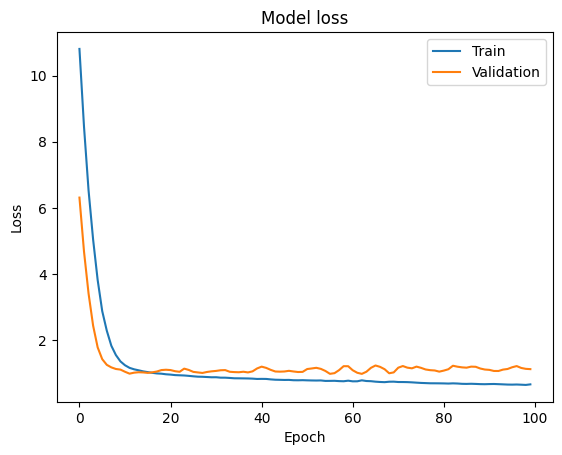

In [15]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoch
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment**: What is a Validation Set? or validation loss?

---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 11.0656 - val_loss: 6.7277
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 8.8330 - val_loss: 5.1074
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 6.8496 - val_loss: 3.7185
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 5.0725 - val_loss: 2.5869
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 3.6063 - val_loss: 1.7881
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 2.5307 - val_loss: 1.3995
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 1.8868 - val_loss: 1.3284
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 1.5995 - val_loss: 1.3700
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 1.4030 - val_loss: 1.2844
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 1.2817 - val_loss: 1.2189
Epoch 11/100
7/7 [

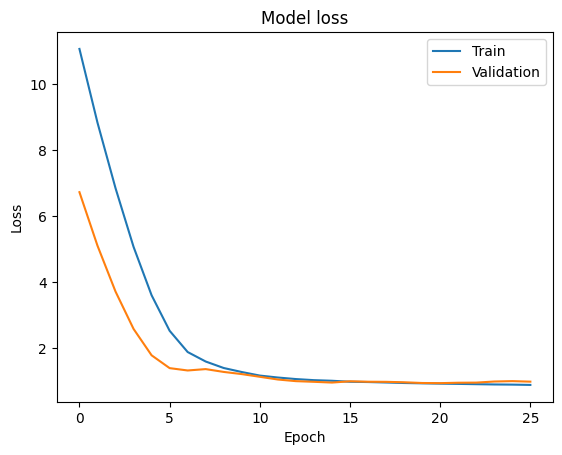

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()